In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Derive text features on tissues

In [7]:
from wsidata import open_wsi
import lazyslide as zs

In [8]:
wsi = open_wsi("https://brd.nci.nih.gov/brd/imagedownload/GTEX-1117F-1626", reader="tiffslide")

In [9]:
wsi

WSI: GTEX-1117F-1626
Reader: tiffslide
SpatialData object, with associated Zarr store: /Users/yzheng/Projects/LazySlide/docs/source/tutorial/GTEX-1117F-1626.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1439, 1696)
├── Shapes
│     ├── 'tiles': GeoDataFrame shape: (4314, 8) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (6, 54) (2D shapes)
└── Tables
      ├── 'resnet50_tiles': AnnData (4314, 1000)
      ├── 'slide_properties': AnnData (0, 0)
      └── 'tile_spec': AnnData (0, 0)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tiles (Shapes), tissues (Shapes)

## Available models

Currently, there are two vision-language models for pathology
- [PLIP](https://doi.org/10.1038/s41591-023-02504-3), Nature Medicine, 2023
- [CONCH](https://doi.org/10.1038/s41591-024-02856-4), Nature Medicine, 2024

To embed text features into WSI, we first need to create vision features for these models

In [10]:
zs.tl.feature_extraction(wsi, 'plip', device="mps")

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Output()

In [11]:
texts = ["mucosa", "submucosa", "muscle"]
embeddings = zs.tl.text_embedding(texts, model="plip")

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
mucosa,-0.022973,0.025480,0.028441,0.005866,-0.024645,0.033594,-0.050241,-0.082467,0.013853,0.030659,...,-0.013886,-0.020203,-0.049290,-0.023587,0.010461,0.015678,-0.004766,-0.026021,0.002830,0.060166
submucosa,-0.035914,0.013462,0.025821,-0.022369,-0.031351,0.022991,0.024856,0.001826,0.012294,0.026527,...,-0.023135,-0.024252,-0.032243,-0.011307,-0.010145,0.014115,-0.008943,-0.075472,0.009379,0.031478
muscle,-0.010225,0.035701,-0.018950,-0.022379,-0.022557,-0.029006,0.007454,-0.062247,0.003242,0.019450,...,-0.023254,0.008377,-0.035019,0.005764,0.040339,0.022513,-0.049323,-0.023751,0.011541,0.006524


In [13]:
zs.tl.text_image_similarity(wsi, embeddings)

In [14]:
wsi

WSI: GTEX-1117F-1626
Reader: tiffslide
SpatialData object, with associated Zarr store: /Users/yzheng/Projects/LazySlide/docs/source/tutorial/GTEX-1117F-1626.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1439, 1696)
├── Shapes
│     ├── 'tiles': GeoDataFrame shape: (4314, 8) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (6, 54) (2D shapes)
└── Tables
      ├── 'plip_tiles': AnnData (4314, 512)
      ├── 'plip_tiles_text_similarity': AnnData (4314, 3)
      ├── 'resnet50_tiles': AnnData (4314, 1000)
      ├── 'slide_properties': AnnData (0, 0)
      └── 'tile_spec': AnnData (0, 0)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tiles (Shapes), tissues (Shapes)
with the following elements not in the Zarr store:
    ▸ plip_tiles_text_similarity (Tables)
    ▸ plip_tiles (Tables)

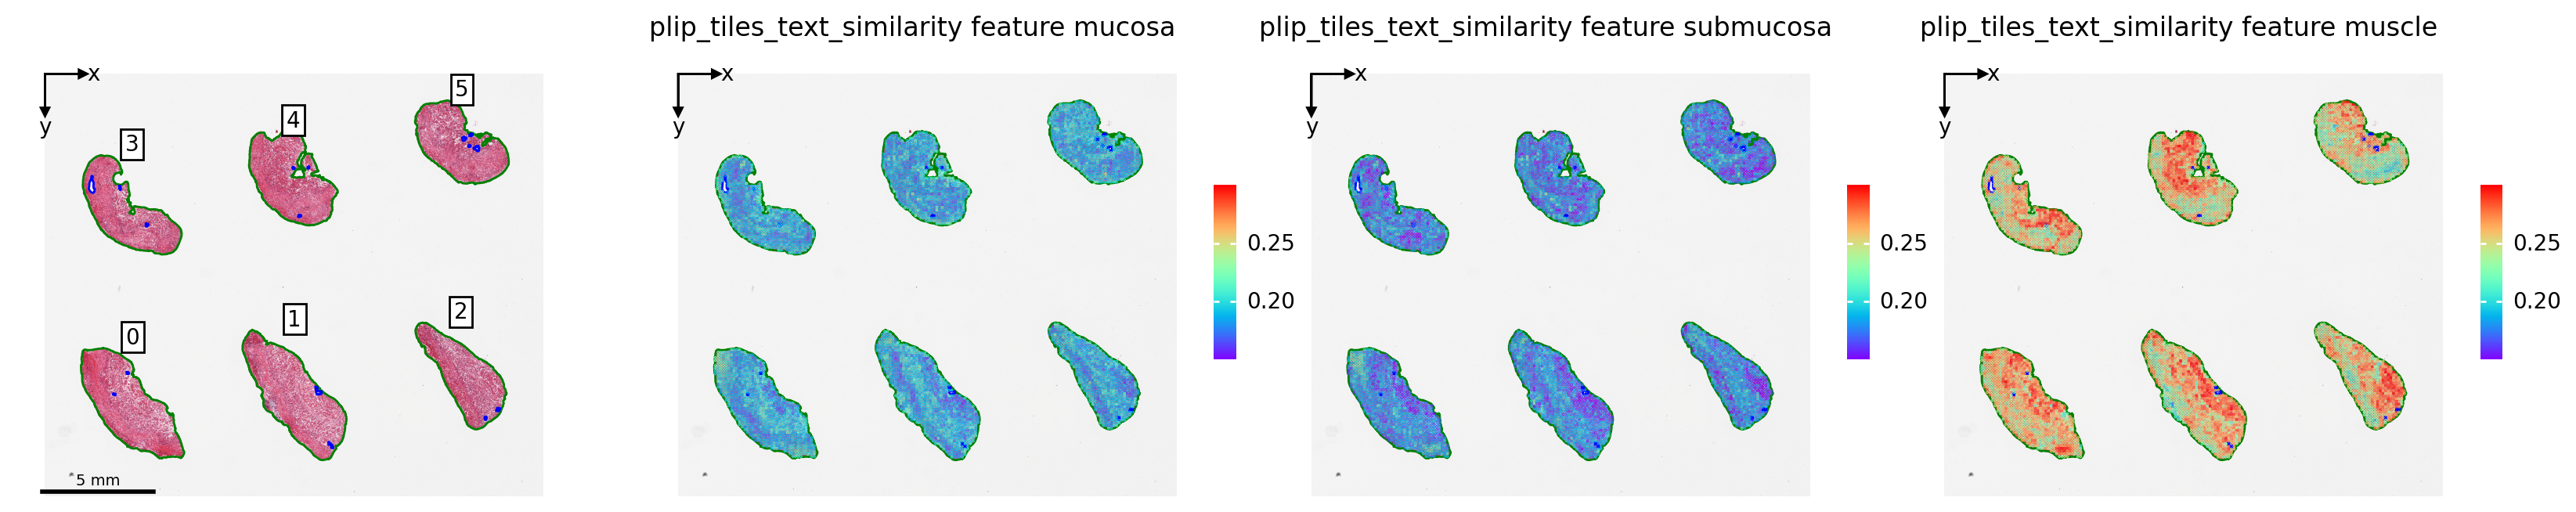

In [22]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(ncols=4, figsize=(20, 5))
zs.pl.tissue(wsi, ax=axes[0])
for t, ax in zip(texts, axes[1::]):
    zs.pl.tiles(wsi, 'plip_tiles_text_similarity', color=t, ax=ax, vmin=0.15, vmax=0.3)